In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from sklearn.cluster import KMeans

In [2]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8 ], [8, 8], [1, 0.6], [9,11]])

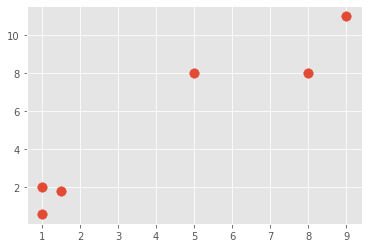

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=90)
plt.show()

In [4]:
colors = 10*["g","r","c","b","k"]

In [5]:
f = [1,2,3,0]
v = f.index(min(f))
print(v)

3


In [6]:
class K_Means:
   
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        #centroid dictionary
        self.centroids = {}
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        for i in range(self.k):  #2->1
            self.centroids[i] = data[i]
        
        # we will run this loop for 300 times (300 iterations)
        for i in range(self.max_iter):
            self.classifications = {}  

            for i in range(self.k):
                self.classifications[i] = []  #{0: [], 1: []}
            for point in data:  #finding distance from centroid , finding mini value , putting them in classification
                distances = [np.linalg.norm(point - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distance
                self.classifications[classification].append(point)
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol: #0.01
                    optimized = False
                    break
            if optimized:
                break
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
model = K_Means(k=6)
model.fit(X)

In [7]:
model.centroids

{0: array([1., 2.]),
 1: array([1.5, 1.8]),
 2: array([5., 8.]),
 3: array([8., 8.]),
 4: array([1. , 0.6]),
 5: array([ 9., 11.])}

In [8]:
model.classifications

{0: [array([1., 2.])],
 1: [array([1.5, 1.8])],
 2: [array([5., 8.])],
 3: [array([8., 8.])],
 4: [array([1. , 0.6])],
 5: [array([ 9., 11.])]}

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter
import pandas as pd
import random

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?','-999999',inplace=True)
df.drop(['id',"label"],axis=1,inplace=True)
full_data  = df.astype('float').values.tolist()
print(full_data)

X = np.array(full_data)

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0], [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0], [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0], [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [7.0, 3.0, 2.0, 10.0, 5.0, 10.0, 5.0, 4.0, 4.0], [1

In [10]:
clf = KMeans(n_clusters=3)
clf.fit(X)
clf.cluster_centers_

array([[ 3.05908096e+00,  1.33041575e+00,  1.45733042e+00,
         1.38730853e+00,  2.13347921e+00,  1.33916849e+00,
         2.10503282e+00,  1.27571116e+00,  1.11159737e+00],
       [ 3.37500000e+00,  2.43750000e+00,  2.87500000e+00,
         1.81250000e+00,  2.43750000e+00, -9.99999000e+05,
         3.12500000e+00,  2.75000000e+00,  1.00000000e+00],
       [ 7.23893805e+00,  6.83185841e+00,  6.76991150e+00,
         5.74778761e+00,  5.46017699e+00,  8.00442478e+00,
         6.15486726e+00,  6.09292035e+00,  2.59734513e+00]])

In [11]:
clf1 = K_Means(k=3)
clf1.fit(X)
clf1.classifications

{0: [array([ 8.00000e+00,  4.00000e+00,  5.00000e+00,  1.00000e+00,
          2.00000e+00, -9.99999e+05,  7.00000e+00,  3.00000e+00,
          1.00000e+00]),
  array([ 6.00000e+00,  6.00000e+00,  6.00000e+00,  9.00000e+00,
          6.00000e+00, -9.99999e+05,  7.00000e+00,  8.00000e+00,
          1.00000e+00]),
  array([ 1.00000e+00,  1.00000e+00,  1.00000e+00,  1.00000e+00,
          1.00000e+00, -9.99999e+05,  2.00000e+00,  1.00000e+00,
          1.00000e+00]),
  array([ 1.00000e+00,  1.00000e+00,  3.00000e+00,  1.00000e+00,
          2.00000e+00, -9.99999e+05,  2.00000e+00,  1.00000e+00,
          1.00000e+00]),
  array([ 1.00000e+00,  1.00000e+00,  2.00000e+00,  1.00000e+00,
          3.00000e+00, -9.99999e+05,  1.00000e+00,  1.00000e+00,
          1.00000e+00]),
  array([ 5.00000e+00,  1.00000e+00,  1.00000e+00,  1.00000e+00,
          2.00000e+00, -9.99999e+05,  3.00000e+00,  1.00000e+00,
          1.00000e+00]),
  array([ 3.00000e+00,  1.00000e+00,  4.00000e+00,  1.00000e+00,
  

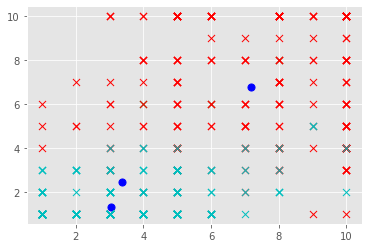

In [12]:
for centroid in clf1.centroids:
    plt.scatter(clf1.centroids[centroid][0], clf1.centroids[centroid][1], marker="o", color="b", s=50, linewidths=1)

for classification in clf1.classifications:
    color = colors[classification]
    #print(color)
    for featureset in clf1.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=1)
plt.show()